In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
import progressbar
from sklearn.preprocessing import LabelEncoder 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [25]:
data=pd.read_csv('dataset.csv')
#data['Area']=data['Area']
#data['Perimeter']=data['Perimeter']
#data['']=data['Area']
#data['Perimeter']=data['Perimeter']
PS = data.loc[data['Type'] == 'PS10']
PE = data.loc[data['Type'] == 'PE10']
print(len(PS))
print(len(PE))
data.head()

119
162


,Area,Perimeter,Circularity,AR,FD,Type
0,532.5,214.894442,0.144904,1.911765,1.55,PS10
1,583.5,243.865005,0.123297,2.175610,1.54,PS10
2,613.0,271.563489,0.104455,0.661202,1.50,PS10
3,2041.5,825.335128,0.037662,0.391657,1.34,PS10
4,687.5,306.291411,0.092090,1.646917,1.54,PS10


0.13064864661344536
0.07663371398145799
0.14932004333950613
0.09733632561967395


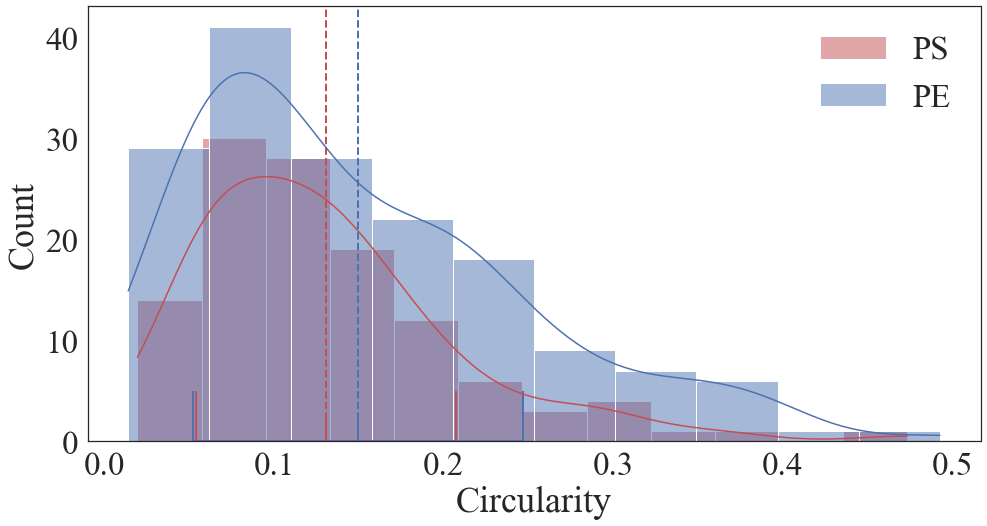

In [27]:
sns.set(rc={"figure.figsize":(16, 8)}) 
sns.set(style="white",font="Times New Roman",font_scale=3)
PSmean=PS['Circularity'].mean()
PSstd=PS['Circularity'].std()
plt.axvline(PSmean, color='r', linestyle='dashed', linewidth=2)
plt.errorbar(PSmean,0,xerr=PSstd,fmt='|', color='r',ms=50,mew=2,capthick=2,capsize=50)
PEmean=PE['Circularity'].mean()
PEstd=PE['Circularity'].std()
plt.axvline(PEmean, color='b', linestyle='dashed', linewidth=2)
plt.errorbar(PEmean,0,xerr=PEstd,fmt='|', color='b',ms=50,mew=2,capthick=2,capsize=50)
sns.histplot(PS['Circularity'], kde=True, stat="count", color="r", label="PS")
sns.histplot(PE['Circularity'], kde=True, stat="count", color="b", label="PE")
plt.legend(frameon=False)
#plt.title('Density Plot with Circularity Values')
plt.xlabel('Circularity')
plt.ylabel('Count')
print(PSmean)
print(PSstd)
print(PEmean)
print(PEstd)

1.2457702532521013
0.8987092987016502
1.3542516251728398
1.1435976323934716


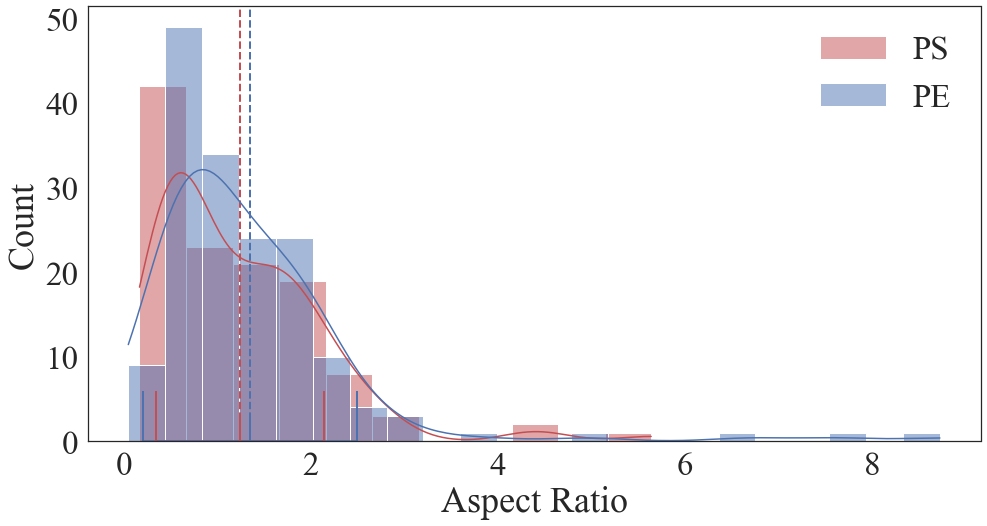

In [28]:
sns.set(rc={"figure.figsize":(16, 8)}) 
sns.set(style="white",font="Times New Roman",font_scale=3)
PSmean=PS['AR'].mean()
PSstd=PS['AR'].std()
plt.axvline(PSmean, color='r', linestyle='dashed', linewidth=2)
plt.errorbar(PSmean,0,xerr=PSstd,fmt='|', color='r',ms=50,mew=2,capthick=2,capsize=50)
PEmean=PE['AR'].mean()
PEstd=PE['AR'].std()
plt.axvline(PEmean, color='b', linestyle='dashed', linewidth=2)
plt.errorbar(PEmean,0,xerr=PEstd,fmt='|', color='b',ms=50,mew=2,capthick=2,capsize=50)
sns.histplot(PS['AR'], kde=True, stat="count", color="r", label="PS")
sns.histplot(PE['AR'], kde=True, stat="count", color="b", label="PE")
plt.legend(frameon=False)
#plt.title('Density Plot with Circularity Values')
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')
print(PSmean)
print(PSstd)
print(PEmean)
print(PEstd)

Text(0, 0.5, 'Count')

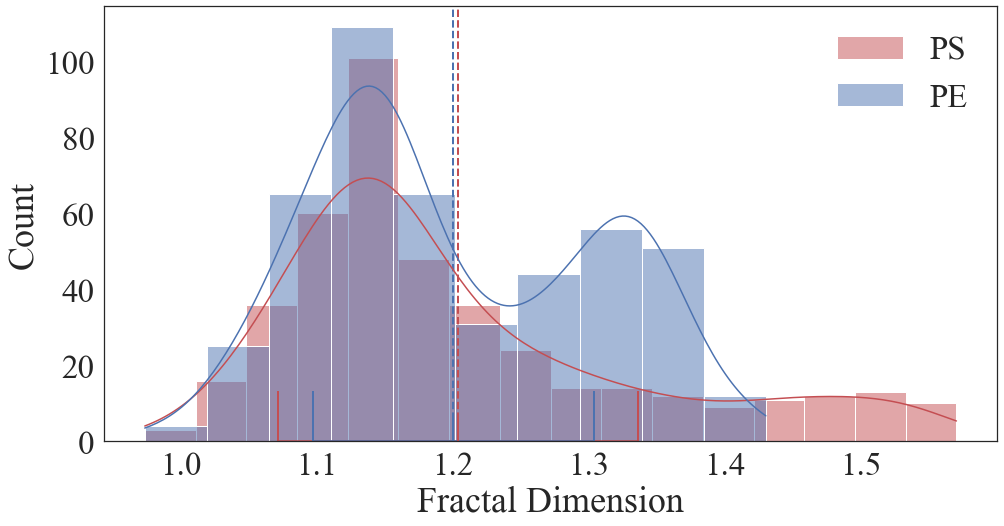

In [52]:
sns.set(rc={"figure.figsize":(16, 8)}) 
sns.set(style="white",font="Times New Roman",font_scale=3)
PSmean=PS['FD'].mean()
PSstd=PS['FD'].std()
plt.axvline(PSmean, color='r', linestyle='dashed', linewidth=2)
plt.errorbar(PSmean,0,xerr=PSstd,fmt='|', color='r',ms=50,mew=2,capthick=2,capsize=50)
PEmean=PE['FD'].mean()
PEstd=PE['FD'].std()
plt.axvline(PEmean, color='b', linestyle='dashed', linewidth=2)
plt.errorbar(PEmean,0,xerr=PEstd,fmt='|', color='b',ms=50,mew=2,capthick=2,capsize=50)
sns.histplot(PS['FD'], kde=True, stat="count", color="r", label="PS")
sns.histplot(PE['FD'], kde=True, stat="count", color="b", label="PE")
plt.legend(frameon=False)
#plt.title('Density Plot with Circularity Values')
plt.xlabel('Fractal Dimension')
plt.ylabel('Count')
print(PSmean)
print(PSstd)
print(PEmean)
print(PEstd)

849.4495798319327
691.2093687907153
1348.0092592592594
1372.0083303717167


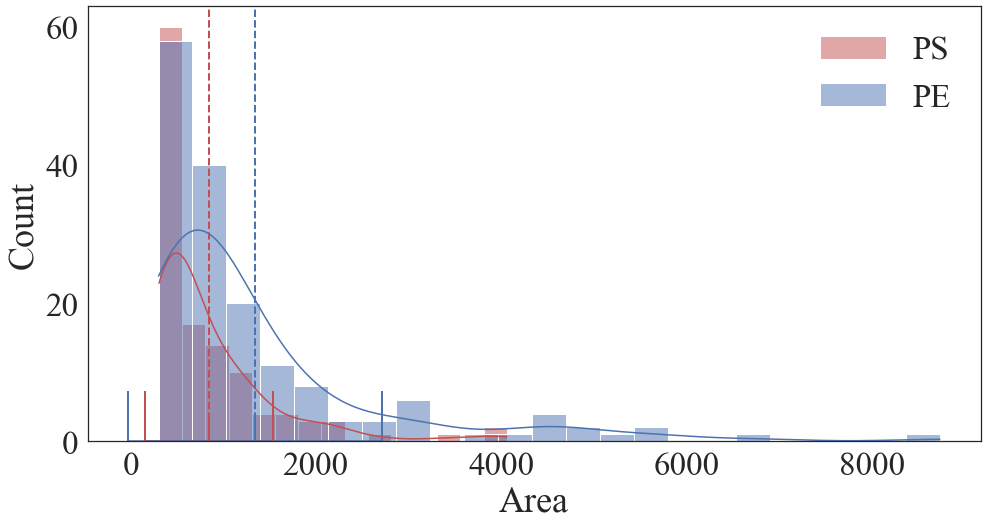

In [44]:
sns.set(rc={"figure.figsize":(16, 8)}) 
sns.set(style="white",font="Times New Roman",font_scale=3)
PSmean=PS['Area'].mean()
PSstd=PS['Area'].std()
plt.axvline(PSmean, color='r', linestyle='dashed', linewidth=2)
plt.errorbar(PSmean,0,xerr=PSstd,fmt='|', color='r',ms=50,mew=2,capthick=2,capsize=50)
PEmean=PE['Area'].mean()
PEstd=PE['Area'].std()
plt.axvline(PEmean, color='b', linestyle='dashed', linewidth=2)
plt.errorbar(PEmean,0,xerr=PEstd,fmt='|', color='b',ms=50,mew=2,capthick=2,capsize=50)
sns.histplot(PS['Area'], kde=True, stat="count", color="r", label="PS")
sns.histplot(PE['Area'], kde=True, stat="count", color="b", label="PE")
plt.legend(frameon=False)
#plt.title('Density Plot with Circularity Values')
plt.xlabel('Area')
plt.ylabel('Count')
print(PSmean)
print(PSstd)
print(PEmean)
print(PEstd)

In [22]:
properties=['Area', 'Perimeter','Circularity','AR','FD'] #categorical columns
for c in properties:
    data[c]=data[c].astype('category')
X = data.iloc[:,:-1]
y = data.iloc[:,5]

In [26]:
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
y=labelencoder_X.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

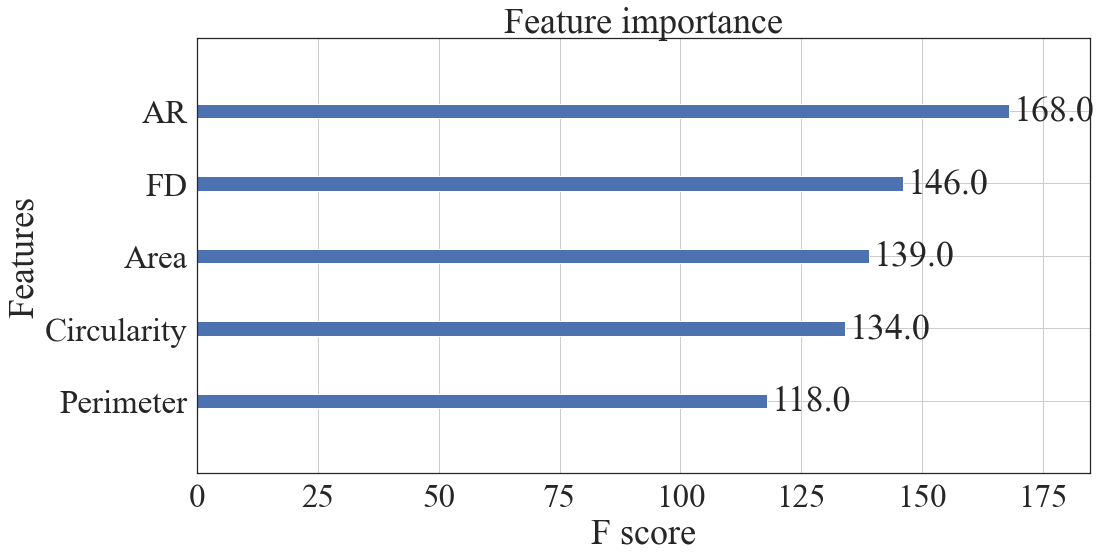

Training set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
---------------
Test set metrics:
Accuracy: 0.7323943661971831
Precision: 0.6666666666666666
Recall: 0.7333333333333333
F1: 0.6984126984126984
Feature 1: 24.13%
Feature 2: 11.39%
Feature 3: 14.93%
Feature 4: 12.07%
Feature 5: 37.48%


In [48]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predictions = model.predict(X_test)

# Plot feature importance
plot_importance(model)
plt.show()
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, model.predict(X_train)))
print('Precision:', precision_score(y_train, model.predict(X_train)))
print('Recall:', recall_score(y_train, model.predict(X_train)))
print('F1:', f1_score(y_train, model.predict(X_train)))
print('---------------')
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))
print('Precision:', precision_score(y_test, model.predict(X_test)))
print('Recall:', recall_score(y_test, model.predict(X_test)))
print('F1:', f1_score(y_test, model.predict(X_test)))
# Print the feature importance scores
importance_scores = model.feature_importances_
for i,score in enumerate(importance_scores):
    print("Feature %d: %.2f%%" % (i+1, score*100))

In [28]:
DT = DecisionTreeClassifier() 
DT.fit(X_train, y_train)
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, DT.predict(X_train)))
print('Precision:', precision_score(y_train, DT.predict(X_train)))
print('Recall:', recall_score(y_train, DT.predict(X_train)))
print('F1:', f1_score(y_train, DT.predict(X_train)))
print('---------------')
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, DT.predict(X_test)))
print('Precision:', precision_score(y_test, DT.predict(X_test)))
print('Recall:', recall_score(y_test, DT.predict(X_test)))
print('F1:', f1_score(y_test, DT.predict(X_test)))

Training set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
---------------
Test set metrics:
Accuracy: 0.7464788732394366
Precision: 0.6764705882352942
Recall: 0.7666666666666667
F1: 0.71875


In [29]:
col_sorted_by_importance=DT.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':DT.feature_importances_[col_sorted_by_importance]
})
import plotly_express as px
import plotly.offline as po
px.bar(feat_imp.sort_values(['imps'], ascending=False)[:5], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})

In [30]:
rf=RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Precision:', precision_score(y_train, rf.predict(X_train)))
print('Recall:', recall_score(y_train, rf.predict(X_train)))
print('F1:', f1_score(y_train, rf.predict(X_train)))
print('---------------')
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('Precision:', precision_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))
print('F1:', f1_score(y_test, rf.predict(X_test)))

Training set metrics:
Accuracy: 0.9714285714285714
Precision: 0.9882352941176471
Recall: 0.9438202247191011
F1: 0.9655172413793103
---------------
Test set metrics:
Accuracy: 0.7464788732394366
Precision: 0.6875
Recall: 0.7333333333333333
F1: 0.7096774193548386


In [32]:
col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})
import plotly_express as px
import plotly.offline as po
px.bar(feat_imp.sort_values(['imps'], ascending=False)[:5], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})